In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand, randint, randn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define number of samples to create
num_samples = 201

In [3]:
#create random data
X = pd.Series(data=np.arange(0,num_samples))

In [4]:
# some function to generate linear outcome
def linear_output(x):
    return x*5-10

In [5]:
# generate target variable
y = X.map(linear_output) + 15*randn(num_samples)

[]

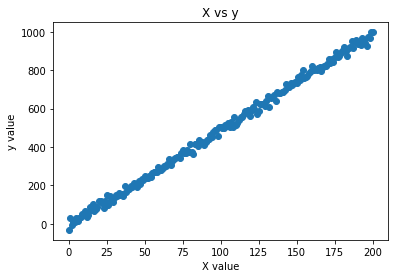

In [6]:
#plot graph to see linear relation
plt.scatter(X,y)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.plot()

In [7]:
# create dataframe
df = pd.DataFrame(columns=['y','X'], data=list(zip(y,X)))

#shuffle data
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

# print correlation
print (df.corr())

         y        X
y  1.00000  0.99864
X  0.99864  1.00000


In [8]:
# split data into testing and training
train_percentile = np.int(np.round(num_samples*.70))
val_percentile = np.int(np.round(num_samples*.20))
test_percentile = np.int(np.round(num_samples*.10))

In [9]:
df_train = df[0:train_percentile]
df_val = df[train_percentile:train_percentile+val_percentile]
df_test = df[train_percentile+val_percentile:]

In [10]:
print ('size of train/val/test is {}/{}/{}'.format(len(df_train),len(df_val),len(df_test)))

size of train/val/test is 141/40/20


In [11]:
# persist individual files
df_train.to_csv('linear_data_train.csv', header=False)
df_val.to_csv('linear_data_val.csv', header=False)
df_test.to_csv('linear_data_test.csv', header=False)

[]

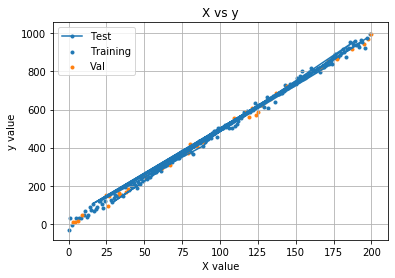

In [12]:
plt.scatter(df_train['X'], df_train['y'],label='Training', marker='.')
plt.scatter(df_val['X'], df_val['y'],label='Val', marker='.')
plt.plot(df_test['X'], df_test['y'],label='Test', marker='.')
plt.grid(True)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.legend()
plt.plot()